# Colab1: Linear Regression on the Boston house dataset (DUE 6. November via Felix)
In this practical you will use a dataset that was taken from the StatLib library which is maintained at Carnegie Mellon University.The Boston house dataset has 506 samples and each sample contains 13 features. The goal is to learn a linear model to predict house prices.


Your code is completely in python.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn==1.1.3
import sklearn

import seaborn as sns
import tensorflow as tf
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.datasets import load_boston

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
boston = load_boston()
print(boston.keys())
print(boston.data.shape)

print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [4]:
X_ = boston.data
y_ = boston.target
mu = np.mean(X_,axis=0)
sigma = np.std(X_,axis=0)
X_ = (X_ - mu)/sigma #data normalization
print(y_.shape)
print(X_.shape)

(506,)
(506, 13)


# Split the data into training: first 400 rows, and validation: rest. (10 Pts)

In [5]:
#your code here:
X_train = X_[0:400, ::]
y_train = np.reshape(y_[:400], (400,1))

#add column of ones in the first column
bias_train = np.ones(400)
X_train = np.c_[bias_train, X_train]
print('data training shape: ', X_train.shape)
print('target training shape: ', y_train.shape)

X_validation = X_[401:, ::]
#add column of ones in the first column
bias_validation = np.ones(105)
X_validation= np.c_[bias_validation, X_validation]
y_validation = np.reshape(y_[401:], (105,1))
print('validation data shape: ', X_validation.shape)
print('target data shape: ', y_validation.shape)

data training shape:  (400, 14)
target training shape:  (400, 1)
validation data shape:  (105, 14)
target data shape:  (105, 1)


# Implement the *Normal Equations* in Python to have the optimal parameters for this model. (25 Pts)

\begin{align}\boldsymbol{\hat \theta} = (X^T X)^{-1}X^T \boldsymbol{y}\end{align}
then apply the found parameters to estimate the prices for the validation data set: \begin{align}\boldsymbol{\hat y}_{validation} = X_{validation} \boldsymbol{\hat\theta}\end{align}

In [41]:
#your code here (opt = theta_hat above):
opt = np.matmul((np.matmul((np.linalg.inv(np.matmul(X_train.transpose(), X_train))), X_train.transpose())), y_train)
print(np.shape(opt))
 
y_hat_validation = np.matmul(X_validation, opt)
print(y_hat_validation.shape)

(14, 1)
(105, 1)


Show a scatterplot of the actual price versus predicted price.

Text(0.5, 1.0, 'Prices vs Predicted prices')

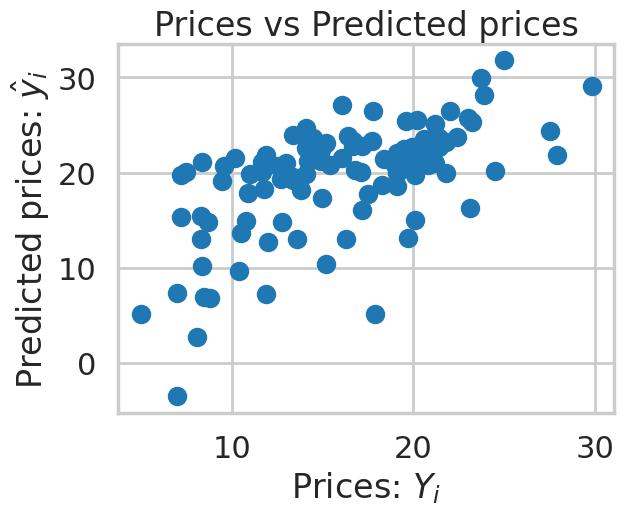

In [7]:
#==============================================================================
plt.scatter(y_validation, y_hat_validation)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices")
#==============================================================================


# Gradient Descent (60 Pts)

> Eingerückter Textblock


Define $\theta$ as the parameter to be updated. The size is 13+1=14. Implement the linear regression by computing the gradient and update the parameters iteratively. Use approximately 1000 iterations. You can set alpha to 0.0001 Set $\theta_0$ to random numbers. Check out `np.random.random_sample`. 

---


\begin{align}
\boldsymbol{\theta}_{k +1}= \boldsymbol{\theta}_{k} - \alpha\nabla{ J(\boldsymbol{\theta})}
\end{align}
where \begin{align}\nabla J(\boldsymbol{\theta})=X^T (\boldsymbol{\hat y_k} -\boldsymbol{y})\end{align} and \begin{align}\boldsymbol{\hat y_k} = X\cdot  \boldsymbol{\theta}_{k}\end{align}



In [8]:
print(np.random.random_sample())

0.916054045061739


In [43]:
#your code here
theta = np.random.random_sample();
alpha = 0.0001;
y_hat_k = 0;
cost_func = 0;

for i in range(1000):
  y_hat_k = np.dot(X_train, theta);
  cost_func = np.matmul(np.transpose(X_train), (y_hat_k - y_train));
  theta = theta - alpha * cost_func;

print(np.shape(y_hat_k))
print(np.shape(cost_func))

(400, 14)
(14, 14)


In [37]:
print(np.shape(theta), theta)

(14, 14) [[23.25147869 23.25147916 23.25147894 23.25147878 23.25147899 23.25147941
  23.25147887 23.25147894 23.25147906 23.25147816 23.25147941 23.25147903
  23.2514797  23.25147879]
 [-1.58673949 -1.58674019 -1.58673963 -1.58673933 -1.58673979 -1.58674006
  -1.58673961 -1.58673973 -1.58673975 -1.58673789 -1.58674104 -1.58673983
  -1.5867402  -1.58673945]
 [ 1.00251551  1.00251559  1.00251543  1.00251533  1.00251557  1.00251549
   1.00251558  1.00251548  1.00251549  1.00251458  1.00251651  1.00251554
   1.00251559  1.00251557]
 [ 0.28154222  0.28154275  0.28154219  0.28154156  0.28154255  0.28154277
   0.28154252  0.28154215  0.28154223  0.28153921  0.28154532  0.28154259
   0.28154285  0.28154247]
 [ 0.45717632  0.45717619  0.45717633  0.45717644  0.45717625  0.45717624
   0.45717627  0.45717631  0.45717631  0.45717699  0.45717562  0.45717625
   0.45717617  0.45717628]
 [-1.69538206 -1.69538289 -1.69538256 -1.69538214 -1.69538257 -1.69538396
  -1.69538248 -1.69538232 -1.69538287 -1.6

**What happens if you set (10 Pts)** 

1.   $\alpha= 0.01$?
2.   $\alpha= 0.00001$?

For which setting can you achieve the correct results by increasing the number of iterations?

**Your answer here.**

alpha = 0,0001: 

(14, 14) [[23.25093277 23.25093553 23.25093423 23.25093333 23.25093455 23.25093699
  23.25093383 23.25093425 23.25093493 23.25092967 23.250937   23.25093477
  23.25093868 23.25093335]
 [-1.58654822 -1.58655231 -1.58654904 -1.58654733 -1.58654999 -1.58655157
  -1.58654893 -1.58654967 -1.58654975 -1.58653894 -1.5865573  -1.5865502
  -1.58655237 -1.586548  ]
 [ 1.00265376  1.00265425  1.00265329  1.00265271  1.00265411  1.00265365
   1.0026542   1.00265363  1.00265367  1.00264833  1.0026596   1.00265393
   1.00265422  1.00265415]
 [ 0.28171431  0.2817174   0.28171415  0.28171048  0.28171623  0.2817175
   0.28171606  0.28171392  0.28171438  0.2816968   0.2817324   0.28171647
   0.28171798  0.28171578]
 [ 0.45712608  0.45712529  0.45712611  0.45712678  0.45712563  0.45712557
   0.45712575  0.457126    0.45712602  0.45712999  0.45712197  0.45712566
   0.45712519  0.45712586]
 [-1.6939419  -1.69394671 -1.69394477 -1.69394237 -1.69394485 -1.69395293
  -1.69394431 -1.69394338 -1.69394658 -1.69393964 -1.6939443  -1.69394641
  -1.69395177 -1.69394337]
 [ 3.43846335  3.43846434  3.43846418  3.4384646   3.43846374  3.4384641
   3.43846305  3.43846454  3.43846417  3.43846581  3.43846108  3.4384637
   3.43846503  3.43846274]
 [ 0.05650667  0.05650649  0.0565065   0.05650536  0.05650688  0.05650792
   0.05650743  0.05650564  0.05650637  0.05650357  0.05650974  0.05650722
   0.05650698  0.05650769]
 [-2.73605926 -2.7360602  -2.73606005 -2.73606079 -2.7360597  -2.73606188
  -2.73605954 -2.73606023 -2.73606134 -2.73606328 -2.73605517 -2.73606
  -2.73606159 -2.73605909]
 [ 3.78589152  3.78590666  3.78589065  3.78587767  3.78590032  3.78590111
   3.78589814  3.78589301  3.78589276  3.78581356  3.78597392  3.78589962
   3.78590929  3.7858962 ]
 [-2.19652179 -2.19653235 -2.19651873 -2.19650737 -2.19652835 -2.1965242
  -2.19652722 -2.19652146 -2.19651977 -2.19644673 -2.19660169 -2.19652672
  -2.19653268 -2.19652631]
 [-1.72954506 -1.72954629 -1.72954545 -1.72954434 -1.72954571 -1.72954736
  -1.72954565 -1.72954503 -1.72954565 -1.72954207 -1.72954776 -1.72954612
  -1.72954664 -1.72954545]
 [-0.02511414 -0.02512144 -0.02511814 -0.02511582 -0.02511916 -0.0251257
  -0.0251173  -0.02511825 -0.02512022 -0.02510538 -0.02512671 -0.02511962
  -0.02513123 -0.02511614]
 [-3.699291   -3.69928861 -3.69928974 -3.69928955 -3.69929003 -3.69928884
  -3.69929113 -3.69928907 -3.69928926 -3.69929001 -3.69929188 -3.69928997
  -3.69928767 -3.69929183]]


 alpha = 0,01: 
  (14, 14) [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
 
 Fehlermeldung: 
 <ipython-input-33-3183c83fd1a9>:7: RuntimeWarning: overflow encountered in matmul
  cost_func = np.matmul(np.transpose(X_train), (y_hat_k - y_train));


alpha = 0,00001: 

 (14, 14) [[21.14806138 21.14810993 21.14811835 21.14811831 21.14813163 21.14811961
  21.14811095 21.14812977 21.1481188  21.14810281 21.14810014 21.14811361
  21.14814727 21.14812577]
 [-0.76747887 -0.76760805 -0.76745151 -0.76746076 -0.76747223 -0.76745268
  -0.76746378 -0.76746244 -0.76746889 -0.76744057 -0.76743191 -0.76745569
  -0.76746459 -0.76746164]
 [ 0.77266581  0.77268475  0.77258561  0.77265732  0.77267075  0.77266349
   0.77267472  0.7726436   0.77271134  0.77268676  0.77268521  0.77263715
   0.77266839  0.77266902]
 [-0.28080111 -0.28079138 -0.28080956 -0.28093763 -0.28078936 -0.28076936
  -0.28081535 -0.28077619 -0.28082125 -0.28077318 -0.28078694 -0.28079776
  -0.28080597 -0.28078256]
 [ 0.83519377  0.83517871  0.83518543  0.83519221  0.83516082  0.83519046
   0.83519216  0.83518661  0.83518152  0.83518879  0.83518825  0.83518058
   0.83518609  0.8351772 ]
 [ 0.17747758  0.1774941   0.177474    0.17750802  0.17748629  0.17735993
   0.17747648  0.17750811  0.17744827  0.17749     0.17749635  0.17745463
   0.17748045  0.17749568]
 [ 3.25662718  3.25664124  3.25664348  3.25662029  3.25664625  3.25663474
   3.25656599  3.25664425  3.25661778  3.25664501  3.25664004  3.2566164
   3.2566411   3.2565831 ]
 [ 0.26625221  0.2662488   0.26621858  0.26626567  0.26624691  0.26627258
   0.26625047  0.2661218   0.26620585  0.26624702  0.26624529  0.26623668
   0.26624408  0.26626407]
 [-1.84443368 -1.84443256 -1.84438859 -1.84445431 -1.84443309 -1.84446218
  -1.84445092 -1.84446906 -1.84455363 -1.84443433 -1.84443976 -1.84441706
  -1.84442416 -1.84443181]
 [ 0.18568808  0.1857335   0.18572457  0.18573151  0.18571192  0.1857173
   0.18571405  0.18570985  0.18570342  0.18561961  0.18570748  0.18572693
   0.18569689  0.18571129]
 [-1.00690173 -1.00684497 -1.00686412 -1.00686939 -1.00687576 -1.00686349
  -1.00687805 -1.00687902 -1.00688916 -1.00687966 -1.00696869 -1.00686408
  -1.00688278 -1.0068695 ]
 [-1.58638162 -1.58636213 -1.58640555 -1.58637358 -1.5863768  -1.58639858
  -1.58639506 -1.58638099 -1.58635983 -1.58635358 -1.58635744 -1.58643347
  -1.58636199 -1.58636628]
 [ 3.53799893  3.53797588  3.53797259  3.53796511  3.53797561  3.53797414
   3.53797654  3.5379733   3.53797998  3.53796329  3.53797075  3.53798491
   3.53782782  3.53796619]
 [-3.7438254  -3.74382401 -3.74382962 -3.74381431 -3.74383611 -3.74381346
  -3.74388429 -3.74380954 -3.74383051 -3.74382515 -3.7438188  -3.74382221
  -3.74383665 -3.74394809]]

  -> besseres Ergebnis wird bei mehr Iterationen erzielt. 

  1. 0,01 als Wert für Alpha funktioniert nicht, da die Schrittgröße zu hoch ist, und das Optimum zu schnell überschritten wird.
  2. 0,00001 als Wert für Alpha ist zu klein, es erreicht das Optimum nicht mit 1000 Iterationen, mit mehr Iterationen kann es das Optimum allerdings erreichen. Mit 5000 Iterationen kommt dieser Alpha-Wert sehr nahe ans Optimum.

# Price estimation for validation dataset (5 Pts)
Estimate again the prices for the validation dataset with the iteratively calculated $\theta$.

In [40]:
y_hat_validation = np.matmul(X_validation, theta)
print(np.shape(y_hat_validation))

(105, 14)


Plot again the real prices vs. predicted prices of the gradient descent procedure.

Text(0, 0.5, 'Predicted prices: $\\hat{y}_i$')

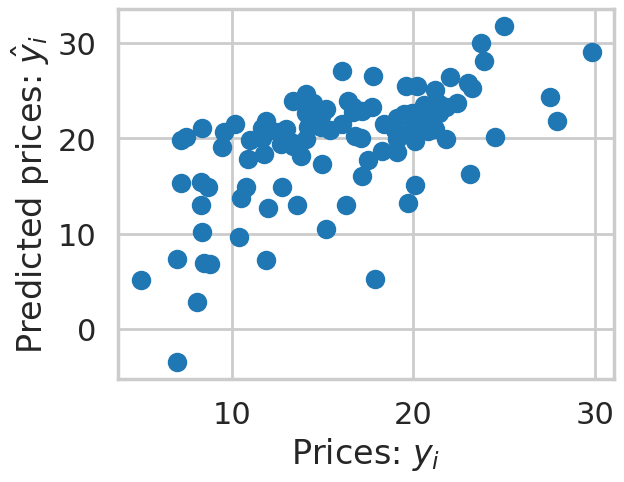

In [44]:
plt.scatter(y_validation, y_hat_validation.flatten())
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
